In [2]:
import matplotlib.pyplot as plt
import pandas as pd

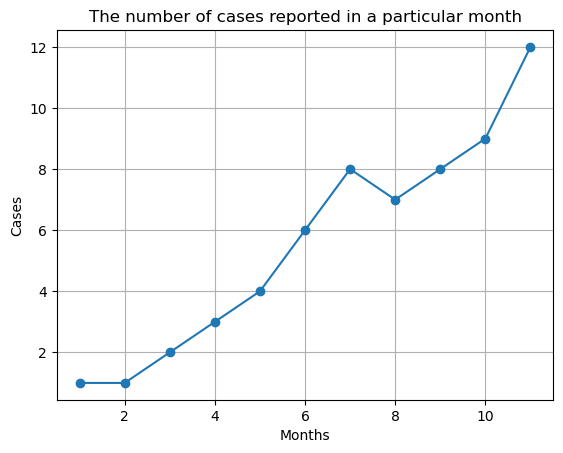

In [9]:
data = pd.Series(
    data=[1, 1, 2, 3, 4, 6, 8, 7, 8, 9, 12],
    index=range(1, 12),
)

# Plot the data
plt.plot(data, marker="o")

# Add a title and labels
plt.title("The number of cases reported in a particular month")
plt.xlabel("Months")
plt.ylabel("Cases")
plt.grid()

# Show the plot
plt.show()

There's a positive trend in number of cases. 

# Trend

Calculating the trend using regression analysis

In [12]:
# extract the y, and time values
t = data.index
y = data.values

In [14]:
beta_1_nume = sum(t * y) - sum(t) * sum(y) / len(t)
beta_1_denom = sum(t**2) - sum(t) ** 2 / len(t)

In [16]:
beta_1 = beta_1_nume / beta_1_denom
print(beta_1)

1.0636363636363637


In [19]:
beta_0 = sum(y - beta_1 * t) / len(t)
print(beta_0)

-0.836363636363637


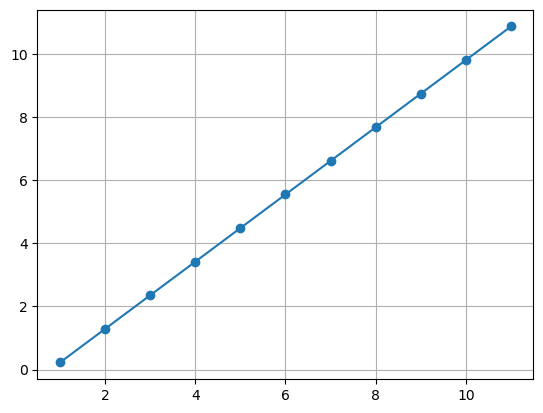

In [33]:
trend = pd.Series(
    data=beta_0 + beta_1 * t,
    index=t,
)

# Plot the trend
trend.plot(
    marker="o",
)
plt.grid()

# De-Trending

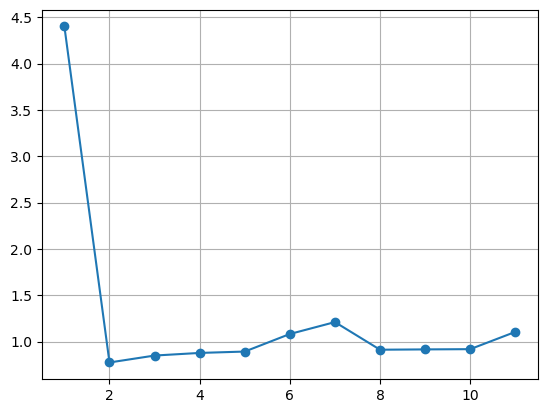

In [34]:
# Assuming the original time series is multiplicative
de_trend_values = data.values / trend.values

de_trend_mul = pd.Series(
    data=de_trend_values,
    index=t,
)

# Plot the de-trended data
de_trend_mul.plot(marker="o")
plt.grid()

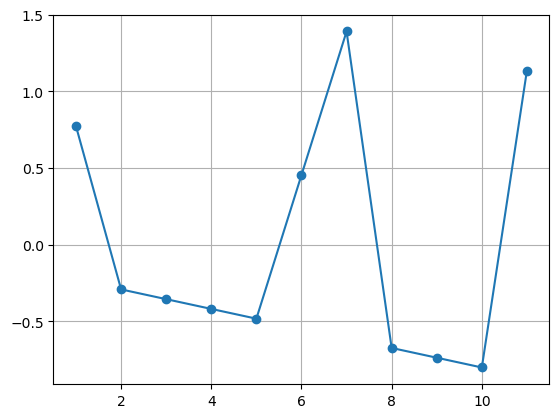

In [35]:
# Assuming the original time series is additive
de_trend_values = data.values - trend.values

de_trend_add = pd.Series(
    data=de_trend_values,
    index=t,
)

# Plot the de-trended data
de_trend_add.plot(marker="o")
plt.grid()